# UnBalanced Datasets

What does an Unbalanced Dataset Mean ? In simple terms, an Unbalanced Dataset is one in which the target variable has more observations in one specific class than others.



+ *UnderSampling*
+ *OverSampling*
+ *Class Weight*



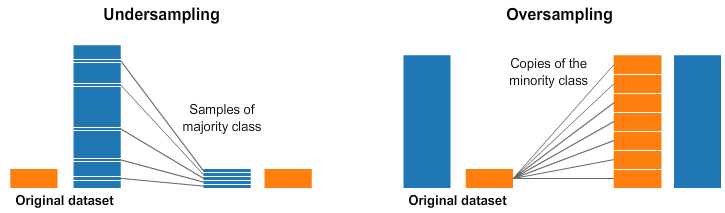

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:
df.Class.value_counts()

Class
0.0    5695
1.0       3
Name: count, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size =0.2)

In [5]:
df_train.Class.value_counts()

Class
0.0    4556
1.0       2
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5699 non-null   int64  
 1   V1      5699 non-null   float64
 2   V2      5699 non-null   float64
 3   V3      5699 non-null   float64
 4   V4      5699 non-null   float64
 5   V5      5699 non-null   float64
 6   V6      5699 non-null   float64
 7   V7      5699 non-null   float64
 8   V8      5699 non-null   float64
 9   V9      5699 non-null   float64
 10  V10     5699 non-null   float64
 11  V11     5699 non-null   float64
 12  V12     5699 non-null   float64
 13  V13     5699 non-null   float64
 14  V14     5699 non-null   float64
 15  V15     5699 non-null   float64
 16  V16     5699 non-null   float64
 17  V17     5699 non-null   float64
 18  V18     5699 non-null   float64
 19  V19     5699 non-null   float64
 20  V20     5699 non-null   float64
 21  V21     5699 non-null   float64
 22  

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5699.000000,5699.000000,5699.000000,5699.000000,5699.000000,5699.000000,5699.000000,5699.000000,5699.000000,5699.000000,...,5699.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000
mean,2502.083874,-0.253943,0.275739,0.841109,0.076845,-0.000224,0.186655,0.021656,-0.037799,0.360929,...,-0.034144,-0.159781,-0.038010,0.031781,0.090191,-0.042070,0.028458,0.004628,64.313854,0.000527
std,1610.716641,1.387190,1.192237,1.017261,1.438054,1.188912,1.360152,1.058691,1.282564,1.033939,...,0.885394,0.646718,0.373201,0.619711,0.405750,0.488857,0.355361,0.250528,193.125531,0.022942
min,0.000000,-12.168192,-15.732974,-12.389545,-4.657545,-32.092129,-7.465603,-12.968670,-23.632502,-3.336805,...,-11.468435,-8.454599,-7.996811,-2.512377,-2.322906,-1.338556,-7.976100,-2.909294,0.000000,0.000000
25%,1102.500000,-0.999311,-0.293840,0.293370,-0.864493,-0.605032,-0.681491,-0.490521,-0.189596,-0.285354,...,-0.255973,-0.593102,-0.187108,-0.346336,-0.150375,-0.404216,-0.048361,-0.017945,4.292500,0.000000
50%,2422.000000,-0.416184,0.339608,0.873099,0.130959,-0.080080,-0.154643,0.046899,0.038497,0.347791,...,-0.107095,-0.175943,-0.046937,0.097315,0.107786,-0.081901,0.017754,0.019326,15.375000,0.000000
75%,3756.000000,1.118828,0.929154,1.489720,1.052254,0.434341,0.594802,0.568084,0.340909,0.913015,...,0.064518,0.277250,0.087049,0.441617,0.355142,0.247535,0.160024,0.082166,56.310000,0.000000
max,5966.000000,1.685314,7.467017,4.101716,6.013346,10.658654,21.393069,34.303177,3.877662,9.272376,...,22.580675,4.393846,4.095021,3.200201,1.972515,3.463246,3.852046,4.712560,7712.430000,1.000000


In [8]:
df.dropna(axis=0, inplace=True)

In [9]:
# Creating X and y without balancing data

X = df.drop(columns='Class')
display(f'features:', X)
y = df.Class
display(f'target:', y)

'features:'

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5693,5959,-1.961528,-1.649726,1.744513,-2.169524,-0.001435,-0.314489,-1.040532,0.096772,-0.315976,...,-0.570026,-0.327018,-0.071531,0.175223,-0.871324,0.524766,-0.123032,0.065383,0.312392,58.20
5694,5961,1.294332,-0.518962,0.510845,-0.398409,-0.943509,-0.534095,-0.625023,-0.145938,0.524246,...,-0.525720,-0.600073,-1.078862,0.166284,0.017758,-0.030545,0.893904,-0.074655,0.005298,37.10
5695,5963,-0.639569,-0.173953,2.395093,-2.398385,-1.190948,-0.400312,-0.644067,0.109593,-1.022246,...,-0.243091,-0.165681,0.129695,-0.278404,0.238205,0.341697,-0.223452,0.275049,0.111419,11.10
5696,5964,1.312196,0.145264,0.251837,0.192722,-0.274677,-0.833531,-0.058272,-0.272861,1.512985,...,-0.108500,-0.411743,-0.981416,0.057299,-0.147979,0.200664,0.807945,-0.116994,-0.005549,13.01


'target:'

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
5693    0.0
5694    0.0
5695    0.0
5696    0.0
5697    0.0
Name: Class, Length: 5698, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


classifier_log = LogisticRegression()
classifier_log.fit(X_train, y_train)

LogisticRegression()

In [12]:
ypred_train = classifier_log.predict(X_train)

In [13]:
accuracy_score(y_train, ypred_train)

1.0

In [14]:
f1_score(y_train, ypred_train)

1.0

In [15]:
f1_score(y_train, ypred_train, average="weighted")

1.0

Acc_score : 0.9997 <br>
f1_score : 0.6666 

Very big difference between the two that means acc not reliable as the dataset is not Balanced

In [16]:
y_test

1436    0.0
748     0.0
4596    0.0
1448    0.0
2543    0.0
       ... 
937     0.0
3075    0.0
4708    0.0
752     0.0
1813    0.0
Name: Class, Length: 1710, dtype: float64

In [17]:
pd.crosstab(y_test, ypred_test)

NameError: name 'ypred_test' is not defined

In [ ]:
f1_score(y_test, ypred_test)

In [ ]:
ypred_test = classifier_log.predict(X_test)

display(f'accuracy_score : {accuracy_score(y_test, ypred_test)}')
# display(f'f1_score not weighted : {f1_score(y_test, ypred_test)}')
display(
    f'f1_score weighted : {f1_score(y_test, ypred_test, average="weighted")}')

**Class weights** are often used in machine learning *when dealing with* **imbalanced datasets**. Imbalanced datasets occur when one class has significantly fewer samples than another class. *In such cases, the model may become biased towards the majority class, leading to poor performance on the minority class.* **Class weights** help *address* this issue by giving more **importance to the minority class** during training.

In scikit-learn, many classifiers accept a class_weight parameter that allows you to assign different weights to different classes. The most common values for the** class_weight parameter** are:

+ **None:** All classes are treated equally.
+ **'balanced':** Automatically adjust weights inversely proportional to class frequencies in the input data.
+ **Custom dictionary:** You can manually specify weights for each class using a dictionary.
Here's an example using the class_weight parameter in scikit-learn:

### Class_weight
#### Balanced

In [ ]:
# Balanced Classifier 

classifier_log_balanced = LogisticRegression(class_weight='balanced')

In [ ]:
classifier_log_balanced.fit(X_train, y_train)

In [ ]:
ypred_train = classifier_log_balanced.predict(X_train)

f1_score(y_train, ypred_train)

In [ ]:
f1_score(y_train, ypred_train, average="weighted")

In [ ]:
ypred_test = classifier_log_balanced.predict(X_test)

f1_score(y_test, ypred_test, average="weighted")

In [ ]:
accuracy_score(y_train, ypred_train)

In [ ]:
accuracy_score(y_test, ypred_test)

#### Dictionary Weights

In [ ]:
# Define class weights (optional)
class_weights = {
    0: 1,
    1: 5
} # giving more weigth onto the class 1 because it is less represented

classifier_log_manually_weighted = LogisticRegression(
    class_weight = class_weights
).fit(X_train, y_train)


y_pred_train = classifier_log_manually_weighted.predict(X_train)

f1_score(y_train, y_pred_train)

In [ ]:
glass_df= pd.read_csv('glass_csv.csv')
glass_df

In [ ]:
glass_df.Type.value_counts()

In [ ]:
glass_df.info()

In [ ]:
X = glass_df.drop(axis=1, columns="Type")
y= glass_df.Type

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
classifier_glass = LogisticRegression().fit(X_train, y_train)
classifier_glass_weighted = LogisticRegression(class_weight='balanced').fit(X_train, y_train)

In [ ]:
y_pred_train_ = classifier_glass.predict(X_train)
y_pred_train_w = classifier_glass_weighted.predict(X_train)


display(f1_score(y_train, y_pred_train_, average='weighted'))
display(f1_score(y_train, y_pred_train_w, average='weighted'))

In [ ]:
accuracy_score(y_train, y_pred_train_)

In [ ]:
accuracy_score(y_train, y_pred_train_w)

In [ ]:
y_pred_test_ = classifier_glass.predict(X_test)
y_pred_test_w = classifier_glass_weighted.predict(X_test)


display(f1_score(y_test, y_pred_test_, average='weighted'))
display(f1_score(y_test, y_pred_test_w, average='weighted'))

In [ ]:
accuracy_score(y_test, y_pred_test_w)

In [ ]:
from sklearn.metrics import  classification_report


print(classification_report(y_test, y_pred_test_w))